In [1]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import Bandit
from optimistic_initial_values import run_experiment as run_experiment_oiv
from ucb1 import run_experiment as run_experiment_ucb

In [2]:
class BayesianBandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        
        #parameters for mu - prior is N(0,1)
        self.predicted_mean = 0
        self.lambda_ = 1
        self.sum_x = 0
        self.tau = 1
        
    def pull(self):
        return np.random.randn()+self.true_mean
    
    def sample(self):
        return np.random.randn()/np.sqrt(self.lambda_)+self.predicted_mean
    
    def update(self, x):
        self.lambda_ += 1
        self.sum_x += x
        self.predicted_mean = self.tau*self.sum_x/self.lambda_

In [3]:
def run_experiment_decaying_epsilon(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)
  
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < 1.0/(i+1):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average

In [4]:
def run_experiment(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

    data = np.empty(N)
  
    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    return cumulative_average

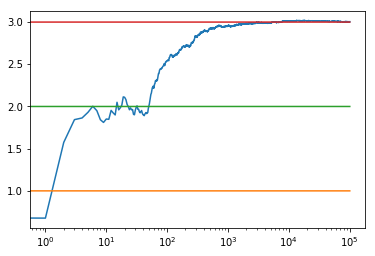

0.21439804561079445
1.9684932660508494
3.004766197911472


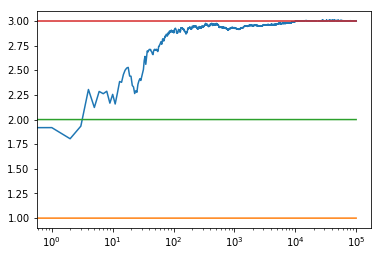

2.84730134552646
2.6234494386722806
3.001265218301264


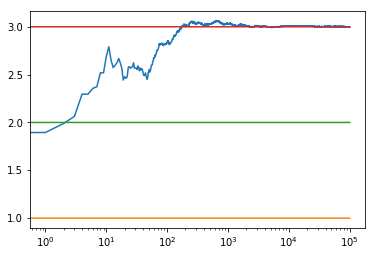

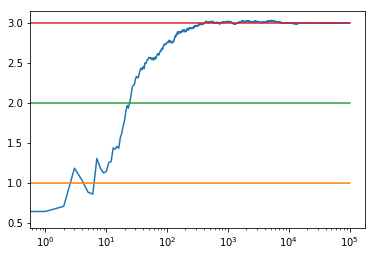

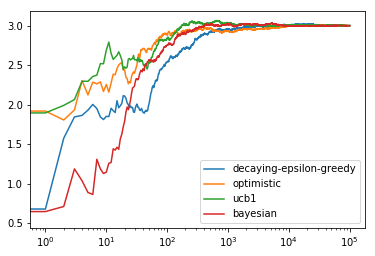

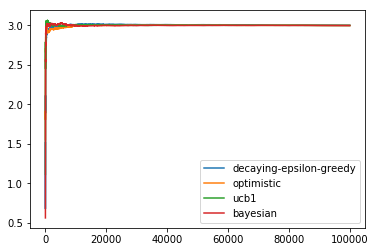

In [5]:
if __name__ == '__main__':
    m1 = 1.0
    m2 = 2.0
    m3 = 3.0
    eps = run_experiment_decaying_epsilon(m1, m2, m3, 100000)
    oiv = run_experiment_oiv(m1, m2, m3, 100000)
    ucb = run_experiment_ucb(m1, m2, m3, 100000)
    bayes = run_experiment(m1, m2, m3, 100000)

    # log scale plot
    plt.plot(eps, label='decaying-epsilon-greedy')
    plt.plot(oiv, label='optimistic')
    plt.plot(ucb, label='ucb1')
    plt.plot(bayes, label='bayesian')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(eps, label='decaying-epsilon-greedy')
    plt.plot(oiv, label='optimistic')
    plt.plot(ucb, label='ucb1')
    plt.plot(bayes, label='bayesian')
    plt.legend()
    plt.show()